In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

- Add interest rate
- Add earnings per share
- Comparison

In [6]:
quarter_loc = '../data_files/quarterly_data/quarters.csv'
df = pd.read_csv(quarter_loc)

### Visualize the missing values in the dataset

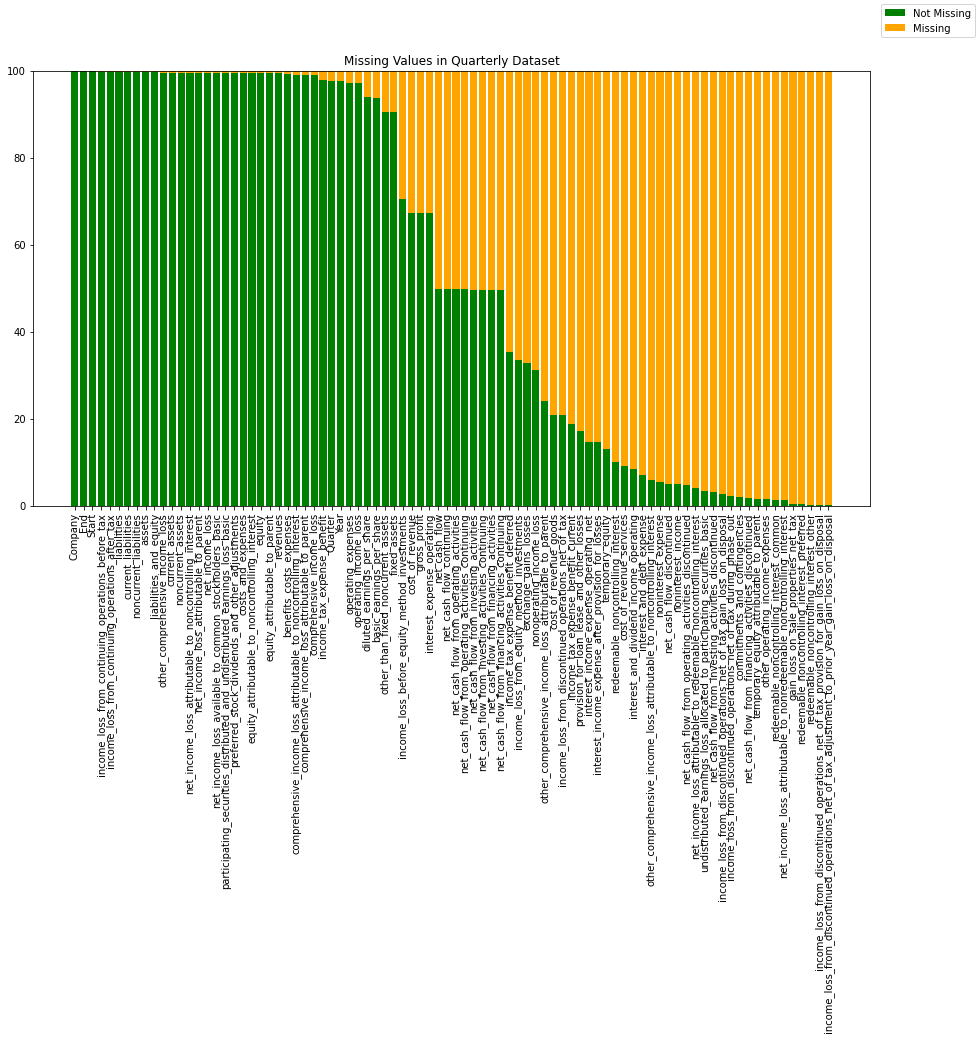

In [7]:
non_missing = df.apply(lambda col: len(col.loc[~pd.isna(col)]))
missing = df.apply(lambda col: len(col.loc[pd.isna(col)]))
non_missing = non_missing.sort_values(ascending=False)
missing = missing.sort_values()

missing = missing / len(df) * 100
non_missing = non_missing / len(df) * 100

fig, ax = plt.subplots()
index = np.arange(len(non_missing.index))
ax.bar(index, non_missing, color='green', label='Not Missing')
ax.bar(index, missing, bottom=non_missing, color='orange', label='Missing')
ax.set_xticks(index)
ax.set_xticklabels(non_missing.index.values, rotation=90)
ax.set_title('Missing Values in Quarterly Dataset')
fig.set_size_inches(15, 8)
fig.legend()

In [23]:
good_cols = []
for i, value in non_missing.iteritems():
    if value > 96:
        good_cols.append(i)
        print('%3d' % value, i)
        
clean_df = df[good_cols].dropna().copy()

100 Company
100 End
100 Start
 99 income_loss_from_continuing_operations_before_tax
 99 income_loss_from_continuing_operations_after_tax
 99 liabilities
 99 current_liabilities
 99 noncurrent_liabilities
 99 assets
 99 liabilities_and_equity
 99 other_comprehensive_income_loss
 99 current_assets
 99 noncurrent_assets
 99 net_income_loss_attributable_to_noncontrolling_interest
 99 net_income_loss_attributable_to_parent
 99 net_income_loss
 99 net_income_loss_available_to_common_stockholders_basic
 99 participating_securities_distributed_and_undistributed_earnings_loss_basic
 99 preferred_stock_dividends_and_other_adjustments
 99 costs_and_expenses
 99 equity_attributable_to_noncontrolling_interest
 99 equity
 99 equity_attributable_to_parent
 99 revenues
 99 benefits_costs_expenses
 99 comprehensive_income_loss_attributable_to_noncontrolling_interest
 99 comprehensive_income_loss_attributable_to_parent
 99 comprehensive_income_loss
 97 income_tax_expense_benefit
 97 Quarter
 97 Year
 97

### Examine Behavior of Quarterly vs Annual Reports For Each Column
- A good method for cleaning the full year data and calling it quarter four is to use a rule-based classifier to classify columns as "additive" or "static"
    - By examining the data, a good rule seems to be if the ratio between the average annual value to the average quarterly value is above two, then the metric is "additive", conversly, if the ratio is below two, then the metric is "static"

In [24]:
grouped = clean_df.groupby('Quarter').agg(NUM=('liabilities', 'count'))
grouped

,NUM
Quarter,
FY,4375
Q1,4721
Q2,4784
Q3,4812
Q4,86


In [52]:
to_agg = clean_df.copy()
to_agg['Q_Pre'] = to_agg['Quarter'].apply(lambda x: x[0])
together = to_agg.groupby('Q_Pre').mean().transpose()
together['Ratio'] = together['F'] / together['Q']
together['Class'] = together['Ratio'].apply(lambda x: "Additive" if x > 2 else "Static")
behave_dict = {}
for i, value in together['Class'].iteritems():
    if value not in behave_dict:
        behave_dict[value] = []
    behave_dict[value].append(i)

outstr = json.dumps(behave_dict)

# with open('../data_files/attr_dict.json', 'w') as out_file:
#     out_file.write(outstr)
#     pass

together

Q_Pre,F,Q,Ratio,Class
income_loss_from_continuing_operations_before_tax,2.871191e+09,7.973165e+08,3.601068,Additive
income_loss_from_continuing_operations_after_tax,1.957211e+09,5.247660e+08,3.729683,Additive
liabilities,4.415027e+10,4.449603e+10,0.992229,Static
current_liabilities,3.319431e+10,3.367674e+10,0.985675,Static
noncurrent_liabilities,1.060169e+10,1.054782e+10,1.005107,Static
assets,5.741533e+10,5.755069e+10,0.997648,Static
liabilities_and_equity,5.741533e+10,5.755528e+10,0.997568,Static
other_comprehensive_income_loss,3.273664e+08,1.173096e+08,2.790618,Additive
current_assets,3.908996e+10,3.968456e+10,0.985017,Static
noncurrent_assets,1.763634e+10,1.726421e+10,1.021555,Static


### Reporting Times
- I want to get a sense of how consistant reporting times are over the year. 

In [9]:
start_times = pd.to_datetime(df['Start']).dt.strftime('%m-%d')
start_times.value_counts()


01-01    7318
07-01    4019
04-01    3886
10-01     570
06-01     220
         ... 
02-29       1
02-19       1
06-03       1
04-20       1
07-12       1
Name: Start, Length: 205, dtype: int64

In [10]:
end_times = pd.to_datetime(df['End']).dt.strftime('%m-%d')
end_times.value_counts()

09-30    4015
06-30    3996
03-31    3833
12-31    3780
10-31     172
         ... 
08-14       1
04-18       1
04-19       1
07-17       1
05-11       1
Name: End, Length: 236, dtype: int64

In [86]:
df = pd.read_csv('../data_files/quarterly_data/A.csv')
df.loc[(df['Year'] == 2011) & (df['Quarter'] == 'Q1')].transpose()

,29,32
comprehensive_income_loss_attributable_to_noncontrolling_interest,0,0
comprehensive_income_loss,201000000.0,218000000.0
other_comprehensive_income_loss,-29000000.0,25000000.0
comprehensive_income_loss_attributable_to_parent,201000000.0,218000000.0
income_loss_before_equity_method_investments,256000000.0,198000000.0
operating_income_loss,271000000.0,211000000.0
benefits_costs_expenses,1321000000.0,1321000000.0
diluted_earnings_per_share,0.65,0.54
net_income_loss_available_to_common_stockholders_basic,230000000.0,193000000.0
net_income_loss,230000000.0,193000000.0


In [80]:
df['Quarter'].value_counts()

Q3    11
Q2    11
Q1    11
FY    11
Name: Quarter, dtype: int64

In [81]:
df.groupby('Quarter').agg(MEAN_REV = ('revenues', 'mean'), COUNT = ('revenues', 'count'))

,MEAN_REV,COUNT
Quarter,,
FY,5.607545e+09,11
Q1,1.366727e+09,11
Q2,1.378545e+09,11
Q3,1.393455e+09,11


In [56]:
dafr = pd.DataFrame(
    {'a': [1, 2, 3],
     'b': [4, 5, 6],
     'c': [7, 8, 9]}
)

dafr = dafr.set_index(['a', 'b'])
dafr

,,c
a,b,
1,4,7
2,5,8
3,6,9


In [78]:
dafr.loc[[(1, 4), (2, 5)], ['c', 'c']] = [9, 10]
dafr

ValueError: Must have equal len keys and value when setting with an iterable